<a href="https://colab.research.google.com/github/henry8904/ML/blob/master/BayesianClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mean1 = [1,1]
cov1 = [[1,0],[0,1]]

mean2 = [-1,-1]
cov2 = [[1,0],[0,1]]

In [0]:
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

In [0]:
y1 = np.ones(500)
y2 = -1*np.ones(500)

In [13]:
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(500, 2)
(500, 2)
(500,)
(500,)


In [0]:
datax = np.concatenate((x1,x2), axis=0)
datay = np.concatenate((y1,y2), axis=0)

In [15]:
print(datax.shape)
print(datay.shape)

(1000, 2)
(1000,)


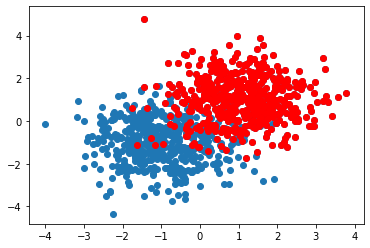

In [19]:
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(x1[:,0],x1[:,1], c="red")

In [24]:
n_data = datax.shape[0]
p_trn=0.7
n_trn = round(n_data*p_trn)
print(n_data, p_trn, n_trn)

idx_array = np.array(range(0,n_data))
idx_array_perm = np.random.permutation(idx_array)
print(idx_array_perm[0:100])

trnx = datax[idx_array_perm[0:n_trn],:]
trny = datay[idx_array_perm[0:n_trn]]
tstx = datax[idx_array_perm[n_trn:n_data],:]
tsty = datay[idx_array_perm[n_trn:n_data]]

1000 0.7 700
[342 260 451 426 284 941 237 829 998  33 936 947 441 994 981 464 357 629
  79 677 639  56 358 821 706 909 275 752 657 681 873  99 599 151 210 152
 527 758 918 987 952 484 534 773 856 890 288 995 418 762 603 201 675 502
 203  19  62 990 504 820 671 630  14 973 184 285  54 476  35 174 719 267
 227 573 828 699 449 408 515 221 623 975 609 311 824 320 109  18 721 398
 950 452 380 259 664  49 917 219 712 446]


In [25]:
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [27]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)
print(tsty_hat)

[ 1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.
  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.
 -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.
 -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1

In [30]:
dif = tsty - tsty_hat
accuracy = 1 - (np.size(np.where(dif != 0)) / np.size(tsty))
print(accuracy)

0.9233333333333333


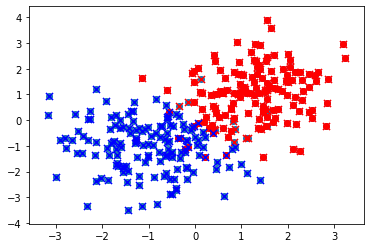

In [32]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat==1),0], tstx[np.where(tsty_hat == 1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat==-1),0], tstx[np.where(tsty_hat==-1),1], c="blue", marker='x', s=50)

In [0]:
clf2 = GaussianNB(priors=[0.1,0.9])
clf2.fit(trnx,trny)
tsty_hat2 = clf2.predict(tstx)

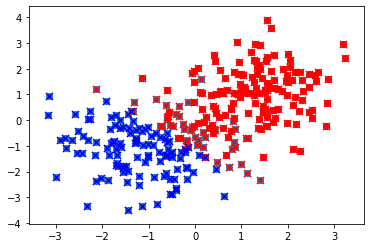

In [34]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat2==1),0], tstx[np.where(tsty_hat2==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat2==-1),0], tstx[np.where(tsty_hat2==-1),1], c="blue", marker='x', s=50)